In [1]:
import warnings;warnings.filterwarnings('ignore')
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### 1.1 神经网络的Hello World
#### 一. Hello World
1. 对MNIST数据集分类  
  1. MNIST数据集 : 60000个手写字母的灰度图片 (28\*28像素) + 10000个测试数据
  2. 识别图片中的数字进行分类 : 0-9
2. 编程步骤 :  
  1. 定义神经网络结构  
    1. 第一层: Dense层, 密集连接层 (也叫全连接层)
    2. 第二层: 10路softmax层, 返回一个数组, 表示被分到10个数字的概率值
  2. 编译步骤 : 
   为了让神经网络进行训练, 还要定义额外的3个编译步骤
    1. loss function : 衡量神经网络表现的方法, 也是神经网络不断迭代的正确方向
    2. optimizer : 神经网络训练的优化方法
    3. Metrics to monitor during training and testing : 这里我们使用精确度度量 (被正确分类的数目)  
  3. 数据预处理  
    1. 输入数据的shape变成符合第一层神经网络输入的需求 : 28\*28的像素展开成一列作为一个输入样本
    2. 输入数据归一化 : 因为灰度值在0~255不方便训练, 所以归一化每个像素点为0~1的值
  4. 输出数据向量化  
    因为数据集中的输出标签为0~9的数字, 为了让输出满足softmax的向量化, 所以使用keras的to_categorical把输出进行独热编码变成向量
  5. 训练模型  
    

In [3]:
# 1. 导入mnist数据集
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
print 'train shape: ',train_images.shape  # ndarray
2. # 构建网络
from keras import models
from keras import layers
network = models.Sequential()
# input_shape : 输入张量的形状, (28*28,)表示1维度向量
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
# 3. 编译
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
# 4. 数据预处理
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255
# 5. 向量化输出
from keras import utils
print 'labels: ',test_labels
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)
# 6. 训练模型
network.fit(train_images,train_labels,epochs=5,batch_size=32)

train shape:  (60000, 28, 28)
labels:  [7 2 1 ... 4 5 6]
Epoch 1/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.2026 - acc: 0.9403
Epoch 2/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.0899 - acc: 0.9744
Epoch 3/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0662 - acc: 0.9811
Epoch 4/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0533 - acc: 0.9858
Epoch 5/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0402 - acc: 0.9891


In [5]:
# 测试集表现
test_loss,test_acc = network.evaluate(test_images,test_labels)
print('test_acc: ', test_acc)

10000/10000 [==============================] - 0s 41us/step
('test_acc: ', 0.9785)


### 1.2 Data Representation

#### 一. 张量 Tensor
1. Scalar - 0D张量
2. Vector - 1D张量
3. Matrix - 2D张量
4. 3D张量和多维张量

#### 二. Tensor的3个属性
1. number of axes(rank) : 张量是几维的
```python
print x.ndim # 0
print y.ndim # 1
print z.ndim # 2
print n3.ndim # 3
```
2. shape : 标量没有的shape为空 : ()

3. datd type 



In [8]:
# 标量 : 0D-tensor
x = np.array(10)

# 1D-tensor
y = np.array([12,3,6,14])

# 2D-tensor
z = np.array([[5,78,2,34,0],
             [6,79,3,35,1],
             [7,89,4,36,2]])

# 3D-tensor
n3 = np.array([[[1,2,3],
                        [2,3,3]],
                      [[1,34,1],
                        [3,5,6]]])

print '0d.shape: ',x.shape
print '1d.shape: ',y.shape
print '2d.shape: ', z.shape
print '3d.shape: ',n3.shape

0d.shape:  ()
1d.shape:  (4,)
2d.shape:  (3, 5)
3d.shape:  (2, 2, 3)


#### 三. 展示MNIST数据集中的图片

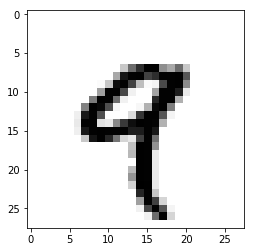

In [45]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
digit = train_images[4]
plt.imshow(digit,cmap=plt.cm.binary) # cmap : colormap, 默认为空,表示输入数据为3Dtensor, RGB图像

#### 四. 真实世界中数据张量的例子
1. Vector data  
 2D张量 (features)
2. TimeSeries数据/序列数据  
 3D张量 (samples, timestamps, features)
3. Images  
 4D张量 (samples, height,width,channels)
4. Video  
 5D张量 (samples,frames,height,width,channel)